In [1]:
import sys
import os
import json
import pandas as pd 
import matplotlib.pyplot as plt
# script_dir = os.path.dirname(os.path.abspath(__file__))
common_dir =os.getenv("COMMON_SCRIPT_DIR")
sys.path.insert(0, common_dir)
from metaphlan import get_abundance,get_metadata,rename_taxonomy
os.chdir(os.getenv("OUTPUT_DIR"))
import seaborn as sns
from statannotations.Annotator import Annotator


params_path = sys.argv[1]
output_path = sys.argv[2]
params_path="params.json"
output_path="output"



In [14]:
# pip install statannotations

In [4]:
with open(params_path) as f:
    data = json.load(f)
abundance0 = get_abundance(data,rename=False)

metadata = get_metadata(data,use_group_field=True)

# rank = data["rank"]

In [5]:
query = data["query"].split(",")
query

['s__Gemella_sanguinis',
 's__Actinomyces_graevenitzii',
 's__Actinomyces_bouchesdurhonensis',
 's__Schaalia_odontolytica',
 's__Streptococcus_australis',
 's__Megasphaera_micronuciformis',
 's__Actinomyces_sp_ICM47',
 's__Veillonella_tobetsuensis',
 's__Schaalia_SGB17153',
 's__Veillonella_parvula',
 's__Mogibacterium_diversum',
 's__Lachnospiraceae_bacterium_oral_taxon_096',
 's__Streptococcus_salivarius',
 's__Veillonella_atypica',
 's__Veillonella_dispar',
 's__Streptococcus_parasanguinis',
 's__Schaalia_SGB17154',
 's__Granulicatella_SGB8255',
 's__Fusobacterium_periodonticum',
 's__Veillonella_rogosae',
 's__Schaalia_SGB17168']

In [6]:
abundance= abundance0[abundance0.index.get_level_values("taxonomy").isin(query)].reset_index(["clade_name","ncbi_tax_id","tax_id","rank"],drop=True)
abundance

,F-30-156,F-30-115,F-30-125,F-30-100,F-30-123,F-30-068,F-30-121,F-30-096,F-30-106,F-30-164,...,F-30-D-009,F-30-D-065,F-30-D-028,F-30-D-043,F-30-D-006,F-30-D-073,F-30-D-049,F-30-D-066,F-30-D-013,F-30-D-004
taxonomy,,,,,,,,,,,,,,,,,,,,,
s__Actinomyces_bouchesdurhonensis,0.00000,0.00000,0.00000,0.00000,0.00000,0.00343,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00511,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
s__Actinomyces_graevenitzii,0.00000,0.01603,0.00674,0.00154,0.00024,0.00788,0.01098,0.00410,0.00128,0.00000,...,0.00067,0.00000,0.01376,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
s__Actinomyces_sp_ICM47,0.00232,0.00226,0.00315,0.00183,0.01373,0.02918,0.16222,0.01281,0.00793,0.00000,...,0.01145,0.00000,0.01166,0.00000,0.00000,0.00548,0.00127,0.00000,0.00000,0.00000
s__Schaalia_SGB17153,0.00000,0.00000,0.03209,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
s__Schaalia_SGB17154,0.00000,0.00000,0.00000,0.00000,0.00000,0.00535,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00165
s__Schaalia_SGB17168,0.00000,0.07169,0.00000,0.00000,0.00440,0.00000,0.01223,0.00687,0.00276,0.00000,...,0.00600,0.00000,0.00430,0.00000,0.00000,0.00131,0.00000,0.00000,0.00000,0.01057
s__Schaalia_odontolytica,0.00000,0.00049,0.00000,0.01285,0.00655,0.00000,0.00141,0.00000,0.00133,0.00000,...,0.00031,0.00000,0.00408,0.00000,0.00000,0.00006,0.00260,0.00108,0.00000,0.00502
s__Gemella_sanguinis,0.00000,0.01032,0.00000,0.00000,0.00888,0.00000,0.01919,0.00271,0.00601,0.00000,...,0.00285,0.00043,0.00059,0.00000,0.01324,0.00842,0.00000,0.00000,0.00831,0.01393
s__Granulicatella_SGB8255,0.00000,0.01624,0.00000,0.00027,0.00725,0.00536,0.02261,0.00103,0.00503,0.00029,...,0.00017,0.00096,0.00305,0.00232,0.00103,0.00346,0.00452,0.00000,0.00088,0.00516


In [7]:
# abundance0[abundance0.index.get_level_values("rank")=="SPECIES"].sum(axis=0)

In [16]:
abundance_group = pd.merge(abundance.T,metadata,left_index=True,right_index=True).reset_index().rename({"index":"sample"},axis=1)

abundance_group

abundance_group.to_csv(f"{output_path}/query_abundance.tsv",sep="\t",index=False)

In [9]:
df_long = pd.melt(abundance_group, id_vars=["sample",'group'], var_name="clade", value_name="abunance")
df_long['clade'] = df_long.apply(lambda x : rename_taxonomy(x['clade']) ,axis=1)

In [10]:
df_long

,sample,group,clade,abunance
0,F-30-156,faeces-SCZ,Actinomyces bouchesdurhonensis,0.00000
1,F-30-115,faeces-SCZ,Actinomyces bouchesdurhonensis,0.00000
2,F-30-125,faeces-SCZ,Actinomyces bouchesdurhonensis,0.00000
3,F-30-100,faeces-SCZ,Actinomyces bouchesdurhonensis,0.00000
4,F-30-123,faeces-SCZ,Actinomyces bouchesdurhonensis,0.00000
...,...,...,...,...
2767,F-30-D-073,faeces-HC,Fusobacterium periodonticum,0.00393
2768,F-30-D-049,faeces-HC,Fusobacterium periodonticum,0.00000
2769,F-30-D-066,faeces-HC,Fusobacterium periodonticum,0.00077
2770,F-30-D-013,faeces-HC,Fusobacterium periodonticum,0.00000


In [14]:
custom_palette = {
    data["groups_name"]["control"]: "#66c2a5",
    data["groups_name"]["treatment"]: "#fc8d62"
}

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Streptococcus australis_faeces-SCZ vs. Streptococcus australis_faeces-HC: Mann-Whitney-Wilcoxon test two-sided, P_val:3.953e-04 U_stat=1.398e+03
Streptococcus parasanguinis_faeces-SCZ vs. Streptococcus parasanguinis_faeces-HC: Mann-Whitney-Wilcoxon test two-sided, P_val:7.805e-03 U_stat=2.752e+03
Streptococcus salivarius_faeces-SCZ vs. Streptococcus salivarius_faeces-HC: Mann-Whitney-Wilcoxon test two-sided, P_val:4.028e-01 U_stat=2.354e+03
Mogibacterium diversum_faeces-SCZ vs. Mogibacterium diversum_faeces-HC: Mann-Whitney-Wilcoxon test two-sided, P_val:3.476e-02 U_stat=2.626e+03
Lachnospiraceae bacterium oral taxon 096_faeces-SCZ vs. Lachnospiraceae bacterium oral taxon 096_faeces-HC: Mann-Whitney-Wilcoxon test two-sided, P_val:1.319e-01 U_stat=1.955e+03
Megasphaera micronuciformis_faeces-SCZ vs

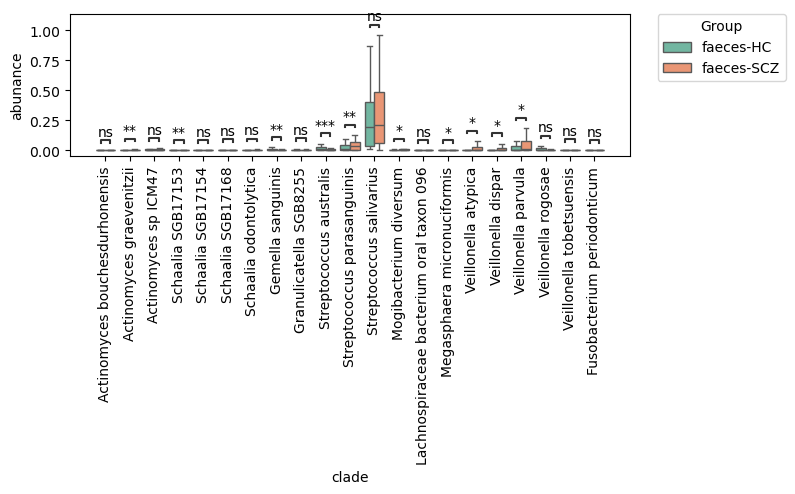

In [17]:
plt.figure(figsize=(8, 5))
ax = sns.boxplot(
    data=df_long,
    x="clade",
    y="abunance",
    palette=custom_palette,
    hue="group",
    showfliers=False,  # 不显示异常值
    hue_order=[data["groups_name"]["control"],data["groups_name"]["treatment"]]
)
plt.legend(
    title='Group',
    bbox_to_anchor=(1.05, 1),   # (x, y)：x > 1 表示图像右边
    loc='upper left',           # 相对于 bbox 的位置
    borderaxespad=0.
)

plt.xticks(rotation=90)
# 构造比较组（每个 clade 比较 SCZ vs HC）
clades = df_long["clade"].unique().tolist()
groups = df_long["group"].unique().tolist()
pairs = [((clade, groups[0]), (clade, groups[1])) for clade in clades]

# 添加显著性标注
annotator = Annotator(
    ax,
    pairs,
    data=df_long,
    x="clade",
    y="abunance",
    
    hue="group",
    order=clades,
    hue_order=groups
)

annotator.configure(
    test="Mann-Whitney",   # 使用独立样本 t 检验
    text_format="star",  # 星号表示显著性
    loc="inside",        # 显示在箱体内
    verbose=1
)
annotator.apply_and_annotate()

plt.ylabel("abunance")
plt.tight_layout()

plt.savefig(f"{output_path}/boxplot.pdf", bbox_inches="tight")
